<a href="https://colab.research.google.com/github/jennif8r/NLP/blob/main/Embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Passo 1: Instalar e importar bibliotecas necessárias


In [30]:
!pip install nltk
# Instalar a biblioteca gensim apra poder ultilizar um modelo pre-treinado
!pip install gensim

In [37]:
import gensim.downloader as api
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from scipy.spatial.distance import cosine
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Passo 2: Carregar o modelo Word2Vec e preprocessar a frase


In [38]:
# Carregar o modelo Word2Vec do Google News
model = api.load("word2vec-google-news-300")
print("Modelo Word2Vec carregado com sucesso.")

# Função de pré-processamento
def preprocess_sentence(sentence):
    # Tokenização
    tokens = word_tokenize(sentence)

    # Remover pontuações
    tokens = [word for word in tokens if word.isalnum()]

    # Remover stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]

    return tokens

# Frase em linguagem natural
sentence = "The queen and the king have their thrones, while the apple is just a fruit."
tokens = preprocess_sentence(sentence)
print(f"Tokens: {tokens}")

# Função para obter o embedding de um token
def get_embedding(token, model):
    try:
        return model[token]
    except KeyError:
        return None

# Obter embeddings para os tokens
embeddings = {token: get_embedding(token, model) for token in tokens if get_embedding(token, model) is not None}
print("Embeddings obtidos para os tokens.")


Modelo Word2Vec carregado com sucesso.
Tokens: ['queen', 'king', 'thrones', 'apple', 'fruit']
Embeddings obtidos para os tokens.


##Passo 3: Redução de dimensionalidade e visualização em 3D


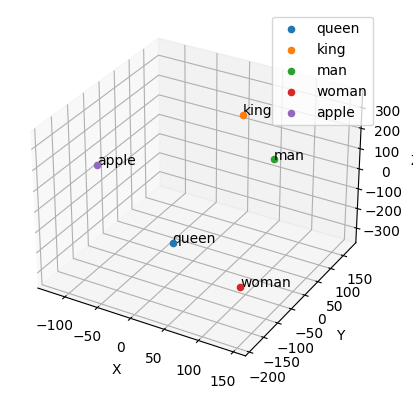

In [41]:
# Tokens de interesse
tokens_of_interest = ['queen', 'king', 'man', 'woman', 'apple']

# Verificar se todos os tokens de interesse têm embeddings
for token in tokens_of_interest:
    if token not in embeddings:
        embeddings[token] = get_embedding(token, model)

# Obter os embeddings para os tokens de interesse
vectors = np.array([embeddings[token] for token in tokens_of_interest])
labels = tokens_of_interest

# Usar t-SNE para reduzir a dimensionalidade para 3D com perplexity ajustado
tsne = TSNE(n_components=3, perplexity=2, random_state=0)
vectors_3d = tsne.fit_transform(vectors)

# Visualizar em 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Adicionar pontos no gráfico 3D
for i, label in enumerate(labels):
    ax.scatter(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], label=label)
    ax.text(vectors_3d[i, 0], vectors_3d[i, 1], vectors_3d[i, 2], label)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend()
plt.show()


In [44]:
# Calcular e imprimir as similaridades
def cosine_similarity(vec1, vec2):
    return 1 - cosine(vec1, vec2)

similarity_queen_woman = cosine_similarity(embeddings['queen'], embeddings['woman'])
similarity_king_man = cosine_similarity(embeddings['king'], embeddings['man'])
similarity_apple_king = cosine_similarity(embeddings['apple'], embeddings['king'])
similarity_apple_queen = cosine_similarity(embeddings['apple'], embeddings['queen'])
similarity_apple_man = cosine_similarity(embeddings['apple'], embeddings['man'])
similarity_apple_woman = cosine_similarity(embeddings['apple'], embeddings['woman'])

print(f"Similarity between 'queen' and 'woman': {similarity_queen_woman}")
print(f"Similarity between 'king' and 'man': {similarity_king_man}")
print(f"Similarity between 'apple' and 'king': {similarity_apple_king}")
print(f"Similarity between 'apple' and 'queen': {similarity_apple_queen}")
print(f"Similarity between 'apple' and 'man': {similarity_apple_man}")
print(f"Similarity between 'apple' and 'woman': {similarity_apple_woman}")


Similarity between 'queen' and 'woman': 0.3161814188088127
Similarity between 'king' and 'man': 0.22942671046977492
Similarity between 'apple' and 'king': 0.1082609606347037
Similarity between 'apple' and 'queen': 0.11686958475289522
Similarity between 'apple' and 'man': 0.11685415529106014
Similarity between 'apple' and 'woman': 0.12263725529735858


##Passo 4: Exportar os embeddings e metadados em arquivos TSV

In [45]:
# Tokens de interesse
tokens_of_interest = ['queen', 'king', 'man', 'woman', 'apple']

# Verificar se todos os tokens de interesse têm embeddings
for token in tokens_of_interest:
    if token not in embeddings:
        embeddings[token] = get_embedding(token, model)

# Obter os embeddings para os tokens de interesse
vectors = np.array([embeddings[token] for token in tokens_of_interest])
labels = tokens_of_interest

# Salvar os embeddings em um arquivo TSV
embeddings_df = pd.DataFrame(vectors)
embeddings_df.to_csv('embeddings.tsv', sep='\t', index=False, header=False)

# Salvar os rótulos em um arquivo TSV
labels_df = pd.DataFrame(labels)
labels_df.to_csv('labels.tsv', sep='\t', index=False, header=False)

print("Arquivos embeddings.tsv e labels.tsv salvos com sucesso.")


Arquivos embeddings.tsv e labels.tsv salvos com sucesso.
